In [1]:
import pandas as pd

# Path to Dev version of autots library
sys.path.append(os.environ['DEV_AUTOTS'])
from auto_ts import AutoTimeSeries as ATS

Running Auto Timeseries version: 0.0.23.b3


In [2]:
%load_ext autoreload
%autoreload 2

# Load Dataset

In [3]:
file_path="https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
dataset = pd.read_csv(file_path, engine='python')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
dataset.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


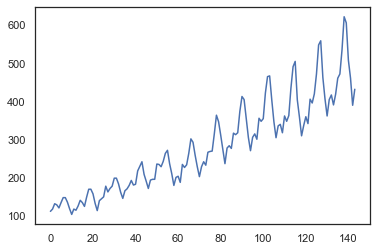

In [5]:
dataset['Passengers'].plot()

# Train Model

In [6]:
ts_column = 'Month'
target = 'Passengers'
sep = ','

In [7]:
FORECAST_PERIOD = 12

In [8]:
automl_model = ATS(
    score_type='rmse',
    forecast_period=FORECAST_PERIOD, time_interval='Month',
    model_type='best', verbose=0
)
        

In [9]:
automl_model.fit(
    traindata=dataset,
    # traindata=file_path,  # Alternately, you can specify the file directly
    ts_column=ts_column,
    target=target,
    cv=3,
    sep=sep)        

Start of Fit.....
    Target variable = Passengers
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: Month sep: , target: Passengers
    Dataframe loaded successfully. Shape of data set = (144, 1)
Time Interval is given as Month


Building Prophet Model



Running Facebook Prophet Model...
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
Num Test Obs Per fold
cutoff
1957-11-29    12
1958-11-30    13
1959-12-01    12
Name: ds, dtype: int64
    RMSE = 42.05
    Std Deviation of Originals = 119.97
    Normalized RMSE = 35%
    RMSE = 35.57
    Std Deviation of Originals = 119.97
    Normalized RMSE = 30%
    RMSE = 43.10
    Std Deviation of Originals = 119.97
    Normalized RMSE = 36%


Building PyFlux Model



Running PyFlux Model...
Pyflux is not installed - hence not running PyFlux model
    PyFlux not installed. Install PyFlux and run it again


Building ARIMA Model



Running Non Seasonal ARIMA Model...

Differencing = 0
 Iteration 0 co

# Evaluate Results

In [10]:
automl_model.get_leaderboard()

,name,rmse
0,Prophet,40.239428
2,ARIMA,53.288355
3,SARIMAX,66.705013
1,PyFlux,inf
4,VAR,inf
5,ML,inf


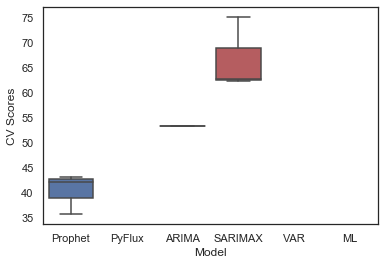

In [11]:
automl_model.plot_cv_scores()

In [12]:
automl_model.get_cv_scores()

,Model,CV Scores
0,Prophet,42.052097
1,Prophet,35.567356
2,Prophet,43.098832
3,PyFlux,inf
4,ARIMA,53.288355
5,SARIMAX,62.643489
6,SARIMAX,62.237596
7,SARIMAX,75.233953
8,VAR,inf
9,ML,inf


In [13]:
results_dict = automl_model.get_ml_dict()

In [14]:
results_dict['Prophet']['forecast']  
# This has CV implemented, however the folds are not consistent with SARIMAX (more work needed to fix)

[           ds        yhat  yhat_lower  yhat_upper    y     cutoff
 0  1957-12-01  365.115413  336.082888  394.443768  336 1957-11-29
 1  1958-01-01  374.164494  344.843408  403.043028  340 1957-11-29
 2  1958-02-01  373.106869  343.117910  401.363690  318 1957-11-29
 3  1958-03-01  405.316930  377.244588  433.921720  362 1957-11-29
 4  1958-04-01  400.762470  369.591588  429.334084  348 1957-11-29
 5  1958-05-01  403.419790  373.851761  431.022198  363 1957-11-29
 6  1958-06-01  434.791157  407.703280  464.216674  435 1957-11-29
 7  1958-07-01  465.543161  439.653592  495.090450  491 1957-11-29
 8  1958-08-01  463.235521  434.567932  495.392372  505 1957-11-29
 9  1958-09-01  433.892535  405.062795  462.222151  404 1957-11-29
 10 1958-10-01  403.633907  375.180166  431.923674  359 1957-11-29
 11 1958-11-01  377.799335  347.252536  409.346168  310 1957-11-29,
            ds        yhat  yhat_lower  yhat_upper    y     cutoff
 12 1958-12-01  386.031637  351.265085  420.742653  337 1958-

In [15]:
results_dict['ARIMA']['forecast'] # CV not implemented yet

,mean,mean_se,mean_ci_lower,mean_ci_upper
Forecast_1,415.818,23.7664,369.236283,462.398874
Forecast_2,442.377,30.3648,382.862610,501.890574
Forecast_3,476.855,32.542,413.073548,540.635807
Forecast_4,509.974,32.8278,445.632512,574.315020
Forecast_5,533.631,32.851,469.243815,598.017362
Forecast_6,542.981,33.0507,478.202813,607.759307
Forecast_7,537.464,33.1441,472.502282,602.424949
Forecast_8,520.578,33.1815,455.543284,585.612250
Forecast_9,498.586,33.9541,432.037246,565.134848
Forecast_10,478.583,36.267,407.501446,549.665344


In [16]:
results_dict['SARIMAX']['forecast'] # This has CV implemented

[Passengers        mean    mean_se  mean_ci_lower  mean_ci_upper
 1958-01-01  374.891448  20.398997     334.910150     414.872747
 1958-02-01  381.334343  31.427487     319.737600     442.931087
 1958-03-01  387.891479  34.654399     319.970105     455.812853
 1958-04-01  378.874426  35.752818     308.800191     448.948662
 1958-05-01  378.449674  35.756898     308.367441     448.531907
 1958-06-01  382.257442  35.788882     312.112522     452.402363
 1958-07-01  385.555721  35.789569     315.409456     455.701987
 1958-08-01  388.075179  35.790106     317.927859     458.222498
 1958-09-01  390.517453  35.790186     320.369978     460.664927
 1958-10-01  393.068259  35.790189     322.920777     463.215740
 1958-11-01  395.653458  35.790192     325.505970     465.800947
 1958-12-01  398.228343  35.790192     328.080855     468.375831,
 Passengers        mean    mean_se  mean_ci_lower  mean_ci_upper
 1959-01-01  388.908126  21.579306     346.613463     431.202788
 1959-02-01  378.313520 

# Forecast Results

In [17]:
# Using Best Model
future_predictions = automl_model.predict(
    forecast_period=FORECAST_PERIOD
)  
future_predictions

Building Forecast dataframe. Forecast Period = 12


144    462.070306
145    454.772345
146    497.677451
147    487.754502
148    498.359023
149    534.096416
150    577.075507
151    575.488641
152    529.004080
153    492.285233
154    462.206192
155    491.797718
Name: yhat, dtype: float64

In [18]:
# Using specific model
future_predictions = automl_model.predict(
    forecast_period=FORECAST_PERIOD,
    model='SARIMAX'
)
future_predictions

1961-01-01    481.496812
1961-02-01    452.931798
1961-03-01    493.016469
1961-04-01    504.686321
1961-05-01    494.897896
1961-06-01    496.003663
1961-07-01    503.143806
1961-08-01    506.284555
1961-09-01    507.804068
1961-10-01    510.743742
1961-11-01    514.091019
1961-12-01    516.947606
Freq: MS, Name: mean, dtype: float64

In [19]:
# Using specific model
future_predictions = automl_model.predict(
    forecast_period=FORECAST_PERIOD,
    model='Prophet'
)
future_predictions

Building Forecast dataframe. Forecast Period = 12


144    462.070306
145    454.772345
146    497.677451
147    487.754502
148    498.359023
149    534.096416
150    577.075507
151    575.488641
152    529.004080
153    492.285233
154    462.206192
155    491.797718
Name: yhat, dtype: float64